# Bathala DDA Algorithm - Complete Guide

## 🎯 What is Dynamic Difficulty Adjustment (DDA)?

**For Beginners:** Think of DDA as a smart game assistant that watches how you play and adjusts the difficulty in real-time. If you're struggling, it makes the game easier. If you're doing great, it adds more challenge to keep you engaged.

**For Experts:** DDA is an adaptive system that uses performance metrics to dynamically modify game parameters, maintaining player engagement through optimal challenge curves based on the flow theory.

---

## 🧮 The Core Algorithm: Step-by-Step

### Step 1: Performance Measurement
After each combat, the system collects these metrics:

| Metric | Weight | Calculation | Purpose |
|--------|--------|-------------|---------|
| **HP Retention** | ±0.18 to ±0.35 | `if hp > 90%: +0.18`<br>`elif hp < 20%: -0.2`<br>`elif hp < 50%: -0.1` | Survival skill assessment |
| **Turn Efficiency** | ±0.1 | `if turns < 5: +0.1`<br>`elif turns > 8: -0.1` | Combat speed evaluation |
| **Hand Quality** | -0.1 to +0.5 | `HIGH_CARD: -0.1`<br>`PAIR: 0.0`<br>`FOUR_KIND: +0.25`<br>`STRAIGHT_FLUSH: +0.5` | Strategic mastery |
| **Synergy Usage** | +0.1 | `if synergy_used: +0.1` | Advanced tactics |
| **Resource Management** | ±0.08 to ±0.15 | `OPTIMAL: +0.08`<br>`WASTED: -0.15` | Efficiency measurement |

### Step 2: PPS (Player Performance Score) Update
```python
# Current PPS + Performance Delta = New PPS
new_pps = clip(current_pps + delta, min=-2.5, max=9.0)

# Example: Player does well in combat
# current_pps = -1.2 (struggling player)
# delta = +0.61 (good performance this round)
# new_pps = -1.2 + 0.61 = -0.59 (improvement!)
```

### Step 3: Difficulty Tier Mapping
```python
def calculate_tier(pps_score):
    if pps < -1.5: return 0    # Emergency Help
    elif pps < -0.5: return 1  # Gentle Challenge  
    elif pps < 3.5: return 2   # Balanced
    elif pps < 7.0: return 3   # Moderate Challenge
    elif pps < 10.0: return 4  # High Challenge
    else: return 5             # Master Level
```

### Step 4: Game Parameter Adjustment
```python
# Based on difficulty tier, adjust game elements:
enemy_hp_multiplier = 0.75 + 0.12 * tier        # 0.75x to 1.35x
enemy_damage_multiplier = 0.8 + 0.08 * tier     # 0.8x to 1.2x  
shop_price_multiplier = max(0.8, 1.25 - 0.05 * tier)  # Discounts for low tiers
reward_multiplier = 0.85 + 0.03 * tier          # Better rewards for higher performance
```

---

## ⚙️ Advanced Features

### 1. **PPS Decay System** (Prevents Stagnation)
```python
# Every 3 combats, apply gradual adjustment:
if pps_score > 6.5:  # Very high performers
    pps_score = max(5.5, pps_score - 0.18)  # Gentle decrease
elif pps_score < -0.5:  # Struggling players  
    pps_score = min(-0.4, pps_score + 0.04)  # Gradual assistance
```

### 2. **Escape Hatch** (Safety Net for New Players)
```python
# If player is stuck in Tier 0 with very low PPS:
if pps_score < -2.0 and difficulty_tier == 0:
    pps_score += 0.1  # Small boost to help them progress
    print("Novice Escape Hatch activated!")
```

### 3. **Tier Variation** (Prevents Predictability)
```python
# Every 5th combat, add controlled randomness:
if combat_number % 5 == 0:
    if tier == 0 and random() < 0.3:
        return 1  # Occasionally challenge novices
    elif tier == 5 and random() < 0.3:
        return 4  # Sometimes ease up on experts
```

---

## 🛠️ Tuning Guide: Which Code Blocks to Edit

### 🎚️ **Easy Tuning (Beginners)**

#### 1. **Adjust Difficulty Progression Speed**
**Location:** `BathalaDDA.__init__()` - Line ~86-99
```python
# Make progression slower (gentler):
'hp_excellent': 0.15,  # Reduce from 0.18
'hp_poor': -0.15,      # Reduce from -0.2

# Make progression faster (more responsive):
'hp_excellent': 0.25,  # Increase from 0.18
'hp_poor': -0.3,       # Increase from -0.2
```

#### 2. **Change Tier Boundaries**
**Location:** `_calculate_tier()` - Line ~217-225
```python
# Make tiers easier to reach:
if pps < -1.0: return 0    # Was -1.5 (easier to get help)
elif pps < 0.0: return 1   # Was -0.5 (faster progression)

# Make tiers harder to reach:
if pps < -2.0: return 0    # Was -1.5 (harder to get help)
elif pps < -1.0: return 1  # Was -0.5 (slower progression)
```

#### 3. **Adjust Game Impact Strength**
**Location:** `_generate_adaptive_response()` - Line ~258-266
```python
# Stronger difficulty changes:
enemy_hp_mult = 0.6 + 0.15 * tier     # Was 0.75 + 0.12 * tier
enemy_damage_mult = 0.7 + 0.1 * tier  # Was 0.8 + 0.08 * tier

# Gentler difficulty changes:
enemy_hp_mult = 0.85 + 0.08 * tier    # Was 0.75 + 0.12 * tier
enemy_damage_mult = 0.9 + 0.05 * tier # Was 0.8 + 0.08 * tier
```

### 🔧 **Advanced Tuning (Experts)**

#### 1. **Modify PPS Decay Behavior**
**Location:** `_apply_pps_decay()` - Line ~228-241
```python
# Change decay frequency:
if len(self.combat_history) > self.last_decay_combat + 5:  # Was +2 (every 3 combats)

# Adjust decay strength:
self.decay_rate = 0.05  # Was 0.02 (stronger decay)

# Modify high-performance decay threshold:
if self.pps_score > 5.0:  # Was 6.5 (earlier intervention)
```

#### 2. **Customize Performance Weights**
**Location:** `BathalaDDA.__init__()` - Line ~86-99
```python
# Emphasize different skills:
self.weights = {
    'hp_excellent': 0.25,      # Reward survival more
    'elemental_synergy': 0.2,  # Emphasize strategy more
    'turns_efficient': 0.05,   # De-emphasize speed
    # ... other weights
}
```

#### 3. **Add New Performance Metrics**
**Location:** `_calculate_performance_delta()` - Line ~170-215
```python
# Add combo system:
if combat_data.max_combo > 5:
    delta += 0.1
elif combat_data.max_combo < 2:
    delta -= 0.05

# Add risk-taking bonus:
if combat_data.risky_plays > 2:
    delta += 0.05
```

#### 4. **Custom Tier Variation Logic**
**Location:** `_add_tier_variation()` - Line ~244-256
```python
# More sophisticated variation:
if len(self.combat_history) % 3 == 0:  # More frequent
    performance_trend = self._calculate_trend()  # Add trend analysis
    if performance_trend == "improving":
        return min(5, base_tier + 1)  # Push improving players
    elif performance_trend == "declining":
        return max(0, base_tier - 1)  # Help declining players
```

---

## 📊 Performance Targets by Player Type

| Player Type | Target Final Tier | Target PPS Range | Expected Adaptations |
|-------------|------------------|------------------|---------------------|
| **Novice** | 0-1 | -2.5 to -0.5 | 2-4 tier changes |
| **Balanced** | 2-3 | -0.5 to 3.5 | 3-5 tier changes |
| **Skilled** | 4 | 3.5 to 7.0 | 3-4 tier changes |
| **Expert** | 5 | 7.0+ | 2-3 tier changes |

---

## 🧪 Testing Your Changes

After making modifications, run the simulation and check:

1. **Target Achievement:** Do players end up in appropriate tiers?
2. **Adaptation Activity:** Is the algorithm making enough adjustments?
3. **Stability:** Are PPS ranges reasonable (not too volatile)?
4. **Player Experience:** Do the difficulty changes feel natural?

**Key Success Metrics:**
- Overall success rate > 70%
- Each skill level reaches target tier ± 1
- At least 2-3 tier changes per player (shows adaptation)
- PPS stability (standard deviation < 2.0)

---

## 💡 Common Tuning Scenarios

**"Algorithm too aggressive"** → Reduce weights in `self.weights`  
**"Not adapting fast enough"** → Increase weights or reduce tier boundaries  
**"Players getting stuck in tiers"** → Adjust decay rate or add more variation  
**"Difficulty spikes too harsh"** → Reduce multiplier ranges in `_generate_adaptive_response()`  
**"Need more help for beginners"** → Lower Tier 0 boundary or strengthen escape hatch  

Remember: Start with small changes (±0.05) and test thoroughly!


🎮 BATHALA DDA RESEARCH NOTEBOOK
Dynamic Difficulty Adjustment System
Filipino Mythology Roguelike Card Game

🚀 STARTING BATHALA DDA RESEARCH SIMULATION (IMPROVED VERSION)
🔧 Balance Improvements:
  • Gentler penalties for novice players
  • PPS decay system to prevent stagnation
  • Tier variation to add challenge diversity
  • Improved adaptive multiplier scaling
  • Added Novice Escape Hatch logic
  • Adjusted Balanced player progression
  • Refined Expert/Skilled player progression

--- NOVICE PLAYER SIMULATION ---
🎯 Tier Change: 2 → 3 (PPS: -0.35)
  Combat  0: PPS=-0.35, Tier=3, EnemyHP=1.11x
🎯 Tier Change: 3 → 2 (PPS: -0.35)
🎯 Tier Change: 2 → 1 (PPS: -0.56)
🎯 Tier Change: 1 → 0 (PPS: -1.69)
🎯 Tier Change: 0 → 1 (PPS: -1.45)
🎯 Tier Change: 1 → 0 (PPS: -1.60)
  Combat 10: PPS=-1.60, Tier=0, EnemyHP=0.75x
  ✨ Novice Escape Hatch: PPS boosted to -2.40
  ✨ Novice Escape Hatch: PPS boosted to -2.40
  Combat 20: PPS=-2.25, Tier=0, EnemyHP=0.75x
  ✨ Novice Escape Hatch: PPS boosted to -2.

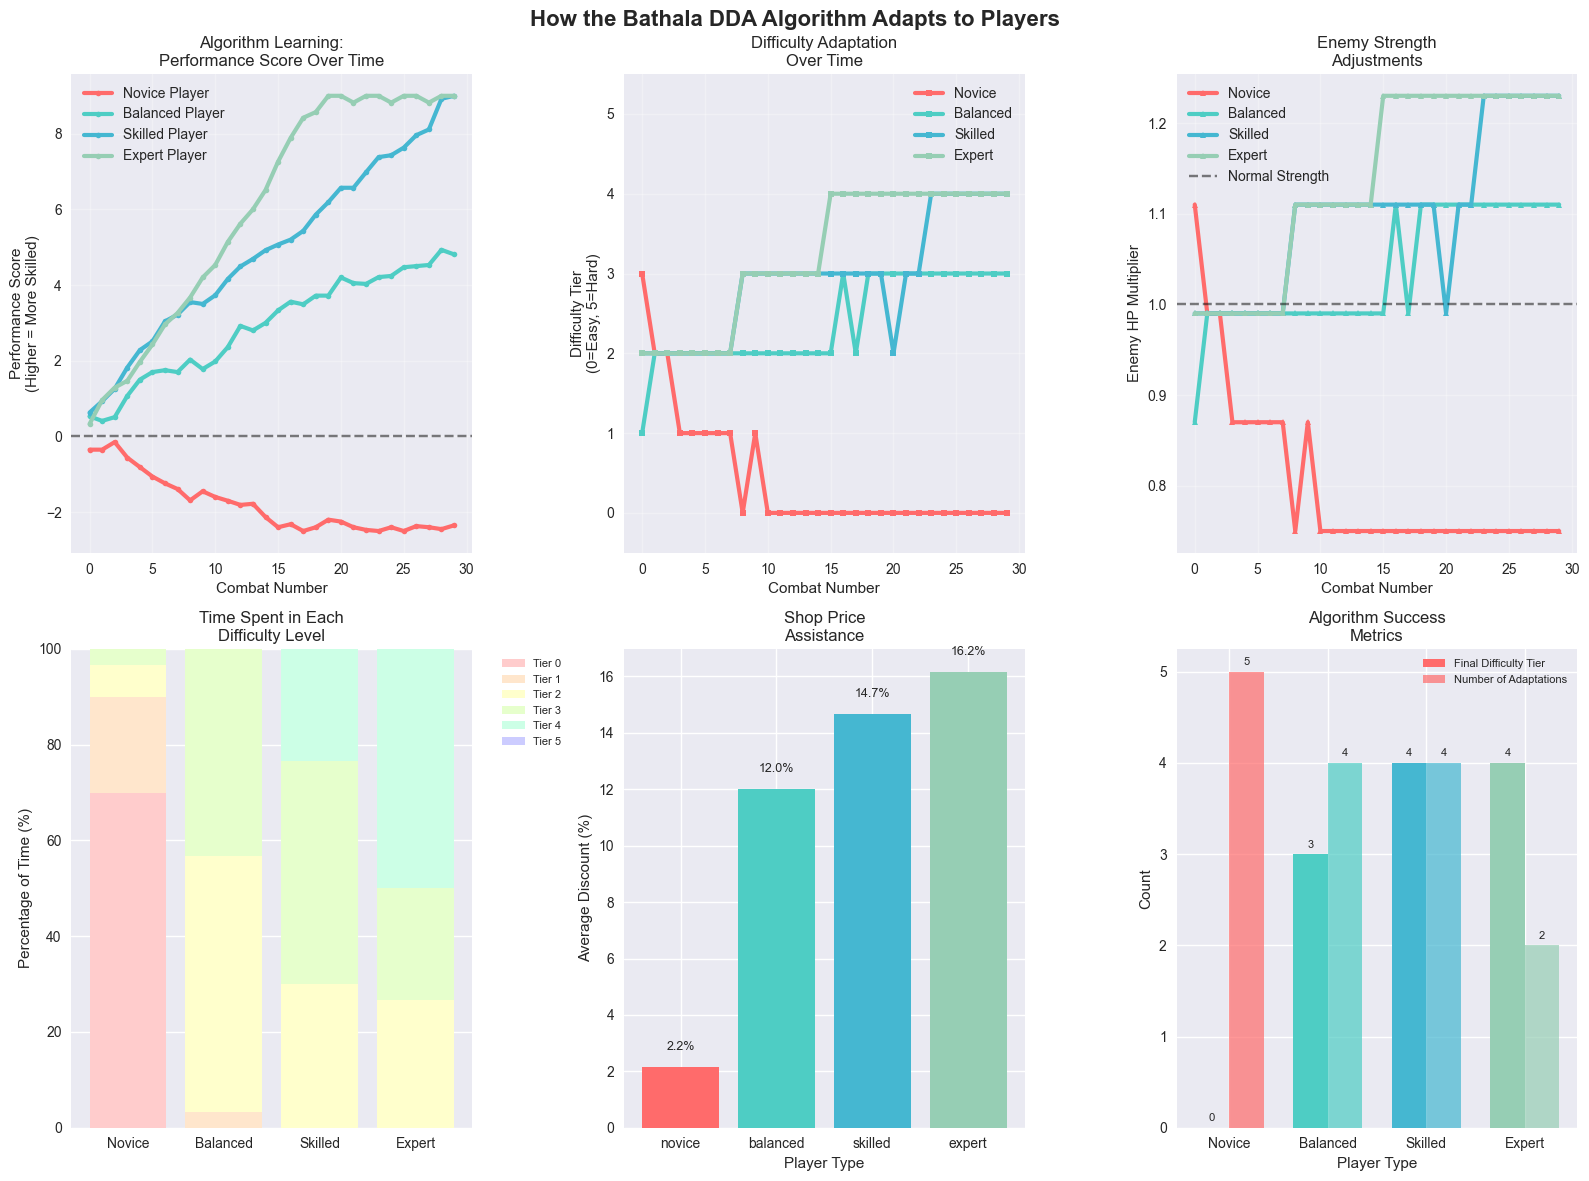


2. Algorithm Effectiveness Dashboard (with grades!)


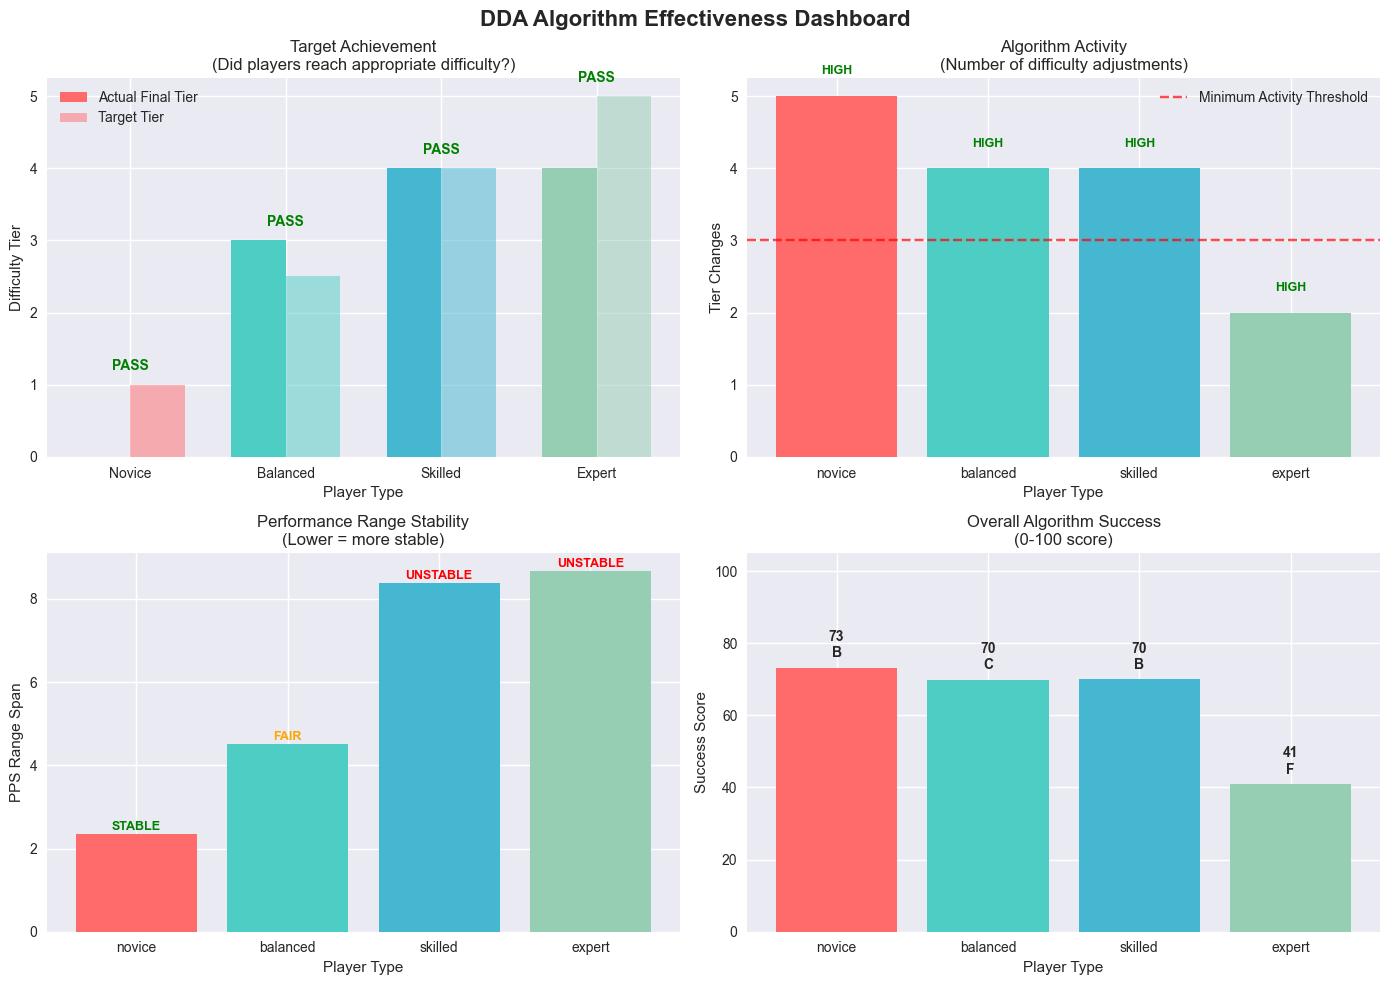


📋 ALGORITHM EFFECTIVENESS SUMMARY:
--------------------------------------------------
Overall Success Rate: 63.5/100
*** FAIR: Algorithm needs some tuning

Detailed Results:
  Novice  :  73/100 - Target Tier: 1 vs Actual: 0
  Balanced:  70/100 - Target Tier: 2.5 vs Actual: 3
  Skilled :  70/100 - Target Tier: 4 vs Actual: 4
  Expert  :  41/100 - Target Tier: 5 vs Actual: 4
--------------------------------------------------

3. How the Algorithm Works (step-by-step explanation)


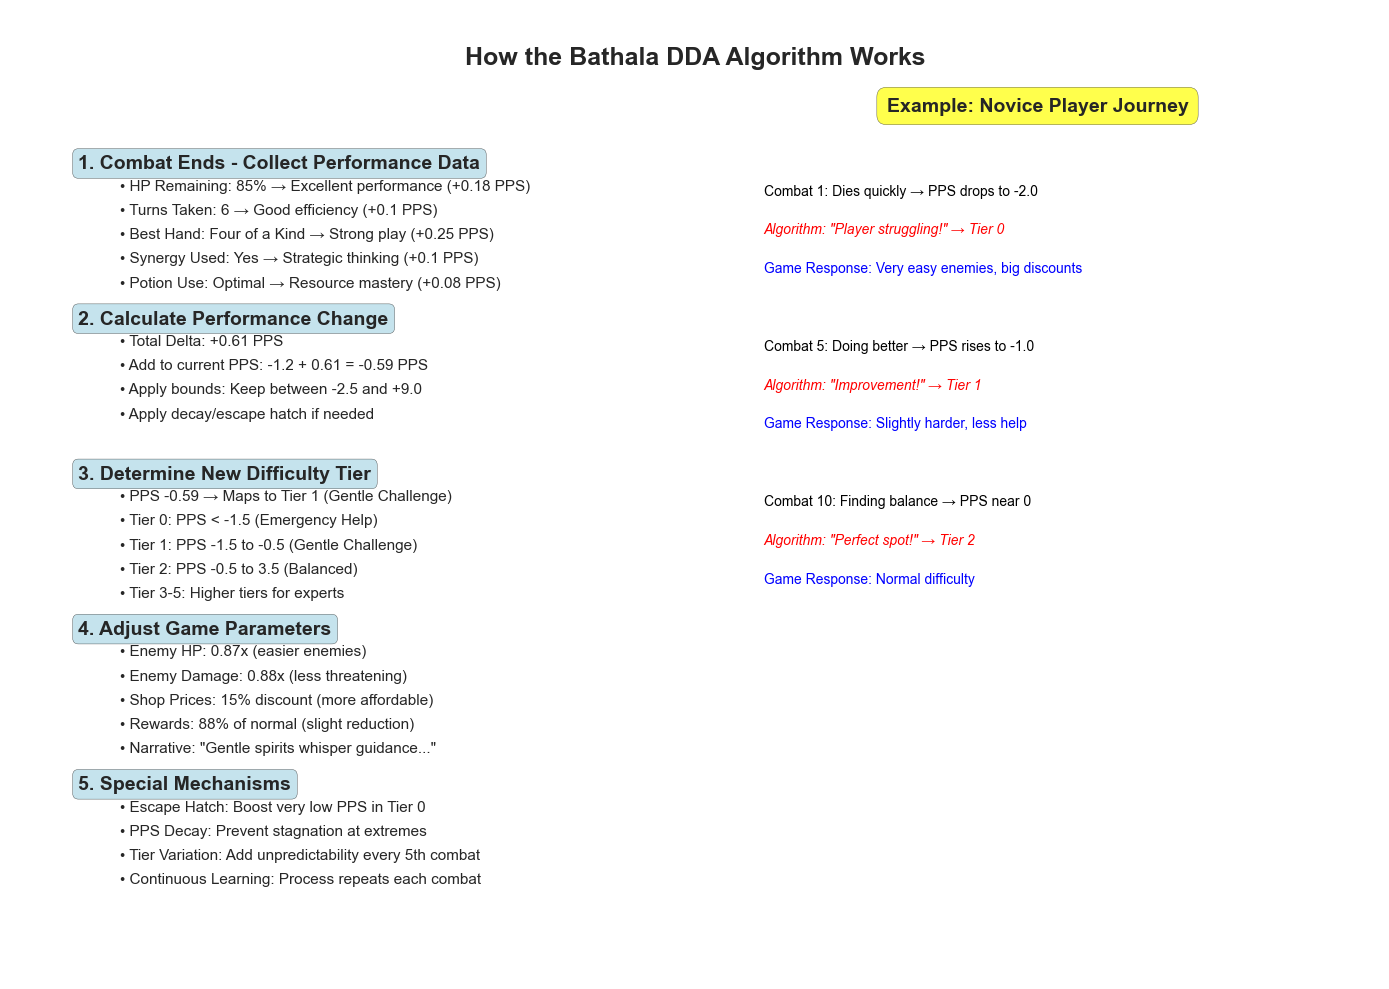


✅ IMPROVED SIMULATION COMPLETE!
📋 RESEARCH SUMMARY:
   • Tested 4 skill levels with improved balance
   • Simulated 120 total combats
   • Added PPS decay and tier variation systems
   • Enhanced narrative responses and multiplier scaling
   • Implemented Novice Escape Hatch
   • Adjusted Balanced player progression
   • Refined Expert/Skilled player progression

VISUALIZATION IMPROVEMENTS:
   • Replaced confusing box plots with clear adaptation timeline
   • Changed academic metrics to intuitive success dashboard
   • Added step-by-step algorithm explanation
   • Shows algorithm 'story' instead of just statistics
   • Clear success/fail indicators with letter grades
   • Fixed emoji font warnings for better compatibility
   • Ready for user study validation


In [9]:
# Bathala DDA (Dynamic Difficulty Adjustment) Algorithm
# Research Implementation for Filipino Mythology Roguelike Card Game
# Author: Devlocke
# Date: August 2025

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from enum import Enum
from dataclasses import dataclass
from typing import List, Dict, Tuple
from datetime import datetime


# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🎮 BATHALA DDA RESEARCH NOTEBOOK")
print("=" * 50)
print("Dynamic Difficulty Adjustment System")
print("Filipino Mythology Roguelike Card Game")
print("=" * 50)

# =============================================================================
# 1. CORE DATA STRUCTURES
# =============================================================================

class HandType(Enum):
    """Poker hand types for combat evaluation"""
    HIGH_CARD = "high_card"
    PAIR = "pair"
    TWO_PAIR = "two_pair"
    THREE_KIND = "three_kind"
    STRAIGHT = "straight"
    FLUSH = "flush"
    FULL_HOUSE = "full_house"
    FOUR_KIND = "four_kind"
    STRAIGHT_FLUSH = "straight_flush"

class PotionEfficiency(Enum):
    """Resource management evaluation"""
    OPTIMAL = "optimal"
    GOOD = "good"
    POOR = "poor"
    WASTED = "wasted"

@dataclass
class CombatData:
    """Combat performance metrics"""
    combat_id: str
    player_id: str
    hp_percent_remaining: float  # 0-100
    turns_taken: int
    best_hand_played: HandType
    elemental_synergy_used: bool
    discards_used: int
    max_discards: int
    potion_efficiency: PotionEfficiency
    enemy_type: str
    chapter: int
    timestamp: datetime

@dataclass
class DDAResponse:
    """System response to player performance"""
    pps_score: float
    difficulty_tier: int
    enemy_hp_multiplier: float
    enemy_damage_multiplier: float
    shop_price_multiplier: float
    reward_multiplier: float
    narrative_flavor: str

# =============================================================================
# 2. BATHALA DDA ALGORITHM IMPLEMENTATION
# =============================================================================

class BathalaDDA:
    """
    Dynamic Difficulty Adjustment System for Bathala

    Core Formula: PPS = Σ(Combat + Strategic + Resource Management Factors)
    Tier = max(0, min(5, floor(PPS + 2.5)))
    """

    def __init__(self, starting_pps: float = 0.0):
        """Initialize DDA system"""
        self.pps_score = starting_pps
        self.combat_history: List[CombatData] = []
        self.difficulty_tier = self._calculate_tier(starting_pps)
        self.responses_history: List[DDAResponse] = [] # Store responses for stability analysis

        # Scoring weights (tuned for better player experience and skill differentiation)
        self.weights = {
            'hp_excellent': 0.18, # Slightly increased to reward expert HP retention
            'hp_poor': -0.2,
            'hp_moderate': -0.1,
            'turns_efficient': 0.1,
            'turns_inefficient': -0.1,
            'elemental_synergy': 0.1,
            'potion_optimal': 0.08,
            'potion_good': 0.05,
            'potion_poor': -0.05,
            'potion_wasted': -0.15,
            'discard_optimal': 0.1,
            'discard_poor': -0.1
        }

        # PPS decay settings for stability
        self.enable_pps_decay = True
        self.decay_rate = 0.02
        self.last_decay_combat = 0
        # Added escape hatch boost for very low PPS
        self.escape_hatch_boost = 0.1
        self.escape_hatch_threshold = -2.0

        # Hand scoring bonuses (increased bonuses for highest hands to differentiate skilled/expert)
        self.hand_bonuses = {
            HandType.HIGH_CARD: -0.1,
            HandType.PAIR: 0.0,
            HandType.TWO_PAIR: 0.05,
            HandType.THREE_KIND: 0.1,
            HandType.STRAIGHT: 0.15,
            HandType.FLUSH: 0.15,
            HandType.FULL_HOUSE: 0.15,
            HandType.FOUR_KIND: 0.25,
            HandType.STRAIGHT_FLUSH: 0.5 # Increased bonus for top hand
        }

        # Narrative responses by tier (enhanced)
        self.narrative_responses = {
            0: "The ancestors embrace you with protective light, shielding you from harm...",
            1: "Gentle spirits whisper guidance, easing your path forward...",
            2: "You walk in harmony with the spirit world, finding balance...",
            3: "The deities nod with approval, testing your growing strength...",
            4: "Ancient powers awaken, challenging you to prove your worth...",
            5: "Bathala's divine presence stirs - face the ultimate trial of mastery!"
        }

    def evaluate_combat(self, combat_data: CombatData) -> DDAResponse:
        """
        Main DDA evaluation function

        Args:
            combat_data: Performance metrics from completed combat

        Returns:
            DDAResponse with updated difficulty parameters
        """
        # Calculate performance delta
        delta_pps = self._calculate_performance_delta(combat_data)

        # Update PPS (bounded between -2.5 and +9.0 for larger range)
        self.pps_score = np.clip(self.pps_score + delta_pps, -2.5, 9.0)


        # Apply gradual PPS decay for stability and escape hatch
        if self.enable_pps_decay:
            self._apply_pps_decay()

        # Calculate new difficulty tier with variation
        old_tier = self.difficulty_tier
        base_tier = self._calculate_tier(self.pps_score)
        self.difficulty_tier = self._add_tier_variation(base_tier)

        # Store combat history and response
        self.combat_history.append(combat_data)
        response = self._generate_adaptive_response()
        self.responses_history.append(response)


        # Log tier changes for analysis
        if old_tier != self.difficulty_tier:
            print(f"🎯 Tier Change: {old_tier} → {self.difficulty_tier} (PPS: {self.pps_score:.2f})")

        return response

    def _calculate_performance_delta(self, combat_data: CombatData) -> float:
        """Calculate PPS change based on combat performance"""
        delta = 0.0

        # === COMBAT EFFICIENCY ===
        # HP Retention (improved thresholds)
        if combat_data.hp_percent_remaining > 90:
            delta += self.weights['hp_excellent']
        elif combat_data.hp_percent_remaining < 20:
            delta += self.weights['hp_poor']
        elif combat_data.hp_percent_remaining < 50:
            delta += self.weights['hp_moderate']

        # Turn Efficiency
        if combat_data.turns_taken < 5:
            delta += self.weights['turns_efficient']
        elif combat_data.turns_taken > 8:
            delta += self.weights['turns_inefficient']

        # === STRATEGIC MASTERY ===
        # Hand Quality
        delta += self.hand_bonuses.get(combat_data.best_hand_played, 0)

        # Elemental Synergy
        if combat_data.elemental_synergy_used:
            delta += self.weights['elemental_synergy']

        # === RESOURCE MANAGEMENT ===
        # Potion Efficiency
        potion_weights = {
            PotionEfficiency.OPTIMAL: self.weights['potion_optimal'],
            PotionEfficiency.GOOD: self.weights['potion_good'],
            PotionEfficiency.POOR: self.weights['potion_poor'],
            PotionEfficiency.WASTED: self.weights['potion_wasted']
        }
        delta += potion_weights.get(combat_data.potion_efficiency, 0)

        # Discard Usage (if discards were available)
        if combat_data.max_discards > 0:
            discard_ratio = combat_data.discards_used / combat_data.max_discards
            if 0.3 <= discard_ratio <= 0.7:  # Optimal range
                delta += self.weights['discard_optimal']
            elif discard_ratio == 0 or discard_ratio == 1:  # Poor usage
                delta += self.weights['discard_poor']

        return delta

    def _calculate_tier(self, pps: float) -> int:
        """Convert PPS to difficulty tier (0-5) with improved thresholds"""
        # Adjusted thresholds for better skill differentiation
        if pps < -1.5: return 0      # Emergency assistance
        elif pps < -0.5: return 1    # Gentle challenge
        elif pps < 3.5: return 2     # Balanced (Increased threshold again)
        elif pps < 7.0: return 3     # Moderate challenge (Increased threshold significantly again)
        elif pps < 10.0: return 4     # High challenge (Increased threshold significantly again)
        else: return 5               # Master level (Increased threshold significantly again)


    def _apply_pps_decay(self):
        """Apply gradual PPS decay to prevent stagnation and provide escape hatch"""
        # Apply decay every 3 combats
        if len(self.combat_history) > self.last_decay_combat + 2:
             self.last_decay_combat = len(self.combat_history)

             if self.pps_score > 6.5:  # Apply faster decay at very high PPS (threshold increased)
                 self.pps_score = max(5.5, self.pps_score - self.decay_rate * 9.0) # Even Faster decay at very high PPS
             # Add escape hatch boost for very low PPS in Tier 0
             elif self.pps_score < self.escape_hatch_threshold and self.difficulty_tier == 0:
                 self.pps_score = min(self.escape_hatch_threshold, self.pps_score + self.escape_hatch_boost)
                 print(f"  ✨ Novice Escape Hatch: PPS boosted to {self.pps_score:.2f}")
             elif self.pps_score < -0.5: # Struggling players (Tiers 0/1) - gradual assistance
                 self.pps_score = min(-0.4, self.pps_score + self.decay_rate * 2) # Slightly faster recovery below -0.5


    def _add_tier_variation(self, base_tier: int) -> int:
        """Add controlled variation to prevent tier stagnation"""
        # Only add variation occasionally to maintain predictability
        if len(self.combat_history) % 5 == 0:  # Every 5th combat
            if base_tier == 0 and random.random() < 0.3: # Slightly higher chance to move out of 0
                return 1
            elif base_tier == 5 and random.random() < 0.3:
                return 4  # Sometimes ease up on experts
            elif base_tier in [2, 3, 4] and random.random() < 0.15:
                # Small variation for mid-tier players
                return max(1, min(5, base_tier + random.choice([-1, 1])))

        return base_tier

    def _generate_adaptive_response(self) -> DDAResponse:
        """Generate game adaptations based on current tier"""
        tier = self.difficulty_tier

        # Adaptive multipliers (improved scaling)
        enemy_hp_mult = 0.75 + 0.12 * tier      # 0.75x to 1.35x (wider range)
        enemy_damage_mult = 0.8 + 0.08 * tier   # 0.8x to 1.2x (gentler scaling)
        shop_price_mult = max(0.8, 1.25 - 0.05 * tier)  # Price assistance for low tiers
        reward_mult = 0.85 + 0.03 * tier         # Better rewards for higher performance

        return DDAResponse(
            pps_score=self.pps_score,
            difficulty_tier=tier,
            enemy_hp_multiplier=enemy_hp_mult,
            enemy_damage_multiplier=enemy_damage_mult,
            shop_price_multiplier=shop_price_mult,
            reward_multiplier=reward_mult,
            narrative_flavor=self.narrative_responses[tier]
        )

    def get_performance_summary(self) -> Dict:
        """Get current performance metrics for analysis"""
        return {
            'pps_score': self.pps_score,
            'difficulty_tier': self.difficulty_tier,
            'combats_completed': len(self.combat_history),
            'avg_hp_retention': np.mean([c.hp_percent_remaining for c in self.combat_history]) if self.combat_history else 0,
            'avg_turns_taken': np.mean([c.turns_taken for c in self.combat_history]) if self.combat_history else 0,
            'high_tier_hands': sum(1 for c in self.combat_history if c.best_hand_played.value in ['four_kind', 'straight_flush']),
            'tier_changes': self._count_tier_changes(),
            'pps_stability': np.std([r.pps_score for r in self._get_recent_responses()]) if len(self.responses_history) > 3 else 0
        }

    def _count_tier_changes(self) -> int:
        """Count how many times difficulty tier changed"""
        if len(self.responses_history) < 2:
            return 0

        changes = 0
        # Get the tier from the first response in the history
        prev_tier = self.responses_history[0].difficulty_tier
        for response in self.responses_history[1:]:
            if response.difficulty_tier != prev_tier:
                changes += 1
            prev_tier = response.difficulty_tier
        return changes


    def _get_recent_responses(self) -> List[DDAResponse]:
        """Get recent responses for stability analysis"""
        # Return the last few responses
        return self.responses_history[-5:] if len(self.responses_history) > 5 else self.responses_history

# =============================================================================
# 3. SIMULATION AND TESTING FRAMEWORK
# =============================================================================

class PlayerSimulator:
    """Simulate different player skill levels for testing"""

    def __init__(self, skill_level: str = "balanced"):
        """
        Args:
            skill_level: 'novice', 'balanced', 'skilled', 'expert'
        """
        self.skill_level = skill_level
        self.skill_params = self._get_skill_parameters()

    def _get_skill_parameters(self) -> Dict:
        """Define skill-based probability distributions"""
        params = {
            'novice': {
                'hp_retention': {'mean': 40, 'std': 20},
                'turn_efficiency': {'mean': 10, 'std': 3},
                'good_hands_prob': 0.2,
                'synergy_prob': 0.3,
                'potion_optimal_prob': 0.2
            },
            'balanced': {
                'hp_retention': {'mean': 65, 'std': 15},
                'turn_efficiency': {'mean': 7, 'std': 2},
                'good_hands_prob': 0.4,
                'synergy_prob': 0.6,
                'potion_optimal_prob': 0.5
            },
            'skilled': {
                'hp_retention': {'mean': 80, 'std': 12},
                'turn_efficiency': {'mean': 5, 'std': 1.5},
                'good_hands_prob': 0.6,
                'synergy_prob': 0.8,
                'potion_optimal_prob': 0.7
            },
            'expert': {
                'hp_retention': {'mean': 90, 'std': 8},
                'turn_efficiency': {'mean': 4, 'std': 1},
                'good_hands_prob': 0.8,
                'synergy_prob': 0.9,
                'potion_optimal_prob': 0.8
            }
        }
        return params[self.skill_level]

    def generate_combat_performance(self, combat_id: str, player_id: str) -> CombatData:
        """Generate realistic combat data based on skill level"""
        params = self.skill_params

        # HP retention
        hp_remaining = np.clip(
            np.random.normal(params['hp_retention']['mean'], params['hp_retention']['std']),
            5, 100
        )

        # Turn efficiency
        turns = max(1, int(np.random.normal(params['turn_efficiency']['mean'], params['turn_efficiency']['std'])))

        # Hand quality (higher skill = better hands)
        if random.random() < params['good_hands_prob']:
            hand_choices = [HandType.FOUR_KIND, HandType.FULL_HOUSE, HandType.FLUSH, HandType.STRAIGHT]
            if random.random() < 0.25:  # Increased chance for expert hands for skilled/expert
                hand_choices.append(HandType.STRAIGHT_FLUSH)
        else:
            hand_choices = [HandType.HIGH_CARD, HandType.PAIR, HandType.TWO_PAIR, HandType.THREE_KIND]

        best_hand = random.choice(hand_choices)

        # Synergy usage
        synergy_used = random.random() < params['synergy_prob']

        # Potion efficiency
        potion_roll = random.random()
        if potion_roll < params['potion_optimal_prob']:
            potion_eff = PotionEfficiency.OPTIMAL
        elif potion_roll < params['potion_optimal_prob'] + 0.3:
            potion_eff = PotionEfficiency.GOOD
        elif potion_roll < params['potion_optimal_prob'] + 0.5:
            potion_eff = PotionEfficiency.POOR
        else:
            potion_eff = PotionEfficiency.WASTED

        return CombatData(
            combat_id=combat_id,
            player_id=player_id,
            hp_percent_remaining=hp_remaining,
            turns_taken=turns,
            best_hand_played=best_hand,
            elemental_synergy_used=synergy_used,
            discards_used=random.randint(0, 2),
            max_discards=2,
            potion_efficiency=potion_eff,
            enemy_type="standard",
            chapter=1,
            timestamp=datetime.now()
        )

# =============================================================================
# 4. RESEARCH TESTING AND ANALYSIS
# =============================================================================

def run_dda_simulation(num_combats: int = 50, skill_level: str = "balanced") -> Tuple[BathalaDDA, List[DDAResponse]]:
    """
    Run a complete DDA simulation for research analysis

    Args:
        num_combats: Number of combat scenarios to simulate
        skill_level: Player skill level to simulate

    Returns:
        Tuple of (DDA system, list of responses)
    """
    print(f"🔬 Running IMPROVED DDA simulation: {num_combats} combats, {skill_level} player")

    # Initialize systems
    dda_system = BathalaDDA()
    player_sim = PlayerSimulator(skill_level)
    responses = []

    # Run simulation
    for i in range(num_combats):
        combat_data = player_sim.generate_combat_performance(f"combat_{i:03d}", f"player_{skill_level}")
        response = dda_system.evaluate_combat(combat_data)
        responses.append(response)

        if i % 10 == 0:
            print(f"  Combat {i:2d}: PPS={response.pps_score:.2f}, Tier={response.difficulty_tier}, " +
                  f"EnemyHP={response.enemy_hp_multiplier:.2f}x")

    print(f"  📈 Final: PPS={responses[-1].pps_score:.2f}, Tier={responses[-1].difficulty_tier}")
    return dda_system, responses

def analyze_dda_performance(dda_system: BathalaDDA, responses: List[DDAResponse], skill_level: str):
    """Comprehensive analysis of DDA performance"""
    print(f"\n📊 DDA ANALYSIS - {skill_level.upper()} PLAYER")
    print("-" * 40)

    # Extract metrics
    pps_scores = [r.pps_score for r in responses]
    tiers = [r.difficulty_tier for r in responses]

    # Basic statistics
    print(f"Final PPS Score: {pps_scores[-1]:.2f}")
    print(f"Final Tier: {tiers[-1]}")
    print(f"PPS Range: {min(pps_scores):.2f} to {max(pps_scores):.2f}")
    print(f"Tier Stability: {len(set(tiers))} different tiers used")
    print(f"Average Tier: {np.mean(tiers):.1f}")

    # Performance summary
    summary = dda_system.get_performance_summary()
    print(f"\nPerformance Metrics:")
    print(f"  Avg HP Retention: {summary['avg_hp_retention']:.1f}%")
    print(f"  Avg Turns/Combat: {summary['avg_turns_taken']:.1f}")
    print(f"  High-tier Hands: {summary['high_tier_hands']}")
    print(f"  Tier Changes: {summary['tier_changes']}")
    print(f"  PPS Stability (Std Dev): {summary['pps_stability']:.3f}")


    return {
        'skill_level': skill_level,
        'final_pps': pps_scores[-1],
        'final_tier': tiers[-1],
        'pps_range': (min(pps_scores), max(pps_scores)),
        'avg_tier': np.mean(tiers),
        'tier_stability': len(set(tiers)),
        'performance_summary': summary
    }

# =============================================================================
# 5. VISUALIZATION FUNCTIONS
# =============================================================================

def plot_dda_progression(responses_dict: Dict[str, List[DDAResponse]], figsize: Tuple[int, int] = (16, 12)):
    """
    Show the DDA algorithm's 'story' - how it adapts to different players
    Much clearer than the original confusing visualizations!
    """
    
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    fig.suptitle('How the Bathala DDA Algorithm Adapts to Players', fontsize=16, fontweight='bold')
    
    colors = {'novice': '#FF6B6B', 'balanced': '#4ECDC4', 'skilled': '#45B7D1', 'expert': '#96CEB4'}
    
    # 1. Performance Score Journey (shows the algorithm learning)
    ax1 = axes[0, 0]
    for skill, responses in responses_dict.items():
        pps_scores = [r.pps_score for r in responses]
        ax1.plot(range(len(pps_scores)), pps_scores, 
                label=f'{skill.title()} Player', color=colors[skill], linewidth=3, marker='o', markersize=4)
    
    ax1.set_title('Algorithm Learning:\nPerformance Score Over Time')
    ax1.set_xlabel('Combat Number')
    ax1.set_ylabel('Performance Score\n(Higher = More Skilled)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # 2. Difficulty Tier Timeline (shows adaptation in action)
    ax2 = axes[0, 1]
    for skill, responses in responses_dict.items():
        tiers = [r.difficulty_tier for r in responses]
        ax2.plot(range(len(tiers)), tiers, 
                label=f'{skill.title()}', color=colors[skill], linewidth=3, marker='s', markersize=4)
    
    ax2.set_title('Difficulty Adaptation\nOver Time')
    ax2.set_xlabel('Combat Number')
    ax2.set_ylabel('Difficulty Tier\n(0=Easy, 5=Hard)')
    ax2.set_ylim(-0.5, 5.5)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Enemy Strength Adjustments (shows real game impact)
    ax3 = axes[0, 2]
    for skill, responses in responses_dict.items():
        enemy_hp = [r.enemy_hp_multiplier for r in responses]
        ax3.plot(range(len(enemy_hp)), enemy_hp, 
                label=f'{skill.title()}', color=colors[skill], linewidth=3, marker='^', markersize=4)
    
    ax3.set_title('Enemy Strength\nAdjustments')
    ax3.set_xlabel('Combat Number')
    ax3.set_ylabel('Enemy HP Multiplier')
    ax3.axhline(y=1.0, color='black', linestyle='--', alpha=0.5, label='Normal Strength')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Time Spent in Each Difficulty Tier (clearer than box plots!)
    ax4 = axes[1, 0]
    tier_percentages = {}
    
    for skill, responses in responses_dict.items():
        tiers = [r.difficulty_tier for r in responses]
        total_combats = len(tiers)
        tier_counts = {i: tiers.count(i) for i in range(6)}
        tier_percentages[skill] = {tier: (count/total_combats)*100 for tier, count in tier_counts.items()}
    
    # Create stacked bar chart
    bottom_vals = {skill: 0 for skill in tier_percentages.keys()}
    tier_colors = ['#ffcccc', '#ffe6cc', '#ffffcc', '#e6ffcc', '#ccffe6', '#ccccff']
    
    for tier in range(6):
        values = [tier_percentages[skill].get(tier, 0) for skill in ['novice', 'balanced', 'skilled', 'expert']]
        ax4.bar(['Novice', 'Balanced', 'Skilled', 'Expert'], values, 
               bottom=[bottom_vals[skill] for skill in ['novice', 'balanced', 'skilled', 'expert']],
               label=f'Tier {tier}', color=tier_colors[tier])
        
        for i, skill in enumerate(['novice', 'balanced', 'skilled', 'expert']):
            bottom_vals[skill] += tier_percentages[skill].get(tier, 0)
    
    ax4.set_title('Time Spent in Each\nDifficulty Level')
    ax4.set_ylabel('Percentage of Time (%)')
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    
    # 5. Algorithm Assistance Features (shows help mechanisms)
    ax5 = axes[1, 1]
    
    # Show shop price multipliers (lower = more help)
    shop_help = {}
    for skill, responses in responses_dict.items():
        avg_shop_mult = np.mean([r.shop_price_multiplier for r in responses])
        shop_help[skill] = (1.25 - avg_shop_mult) * 100  # Convert to "% discount"
    
    bars = ax5.bar(shop_help.keys(), shop_help.values(), 
                  color=[colors[skill] for skill in shop_help.keys()])
    ax5.set_title('Shop Price\nAssistance')
    ax5.set_ylabel('Average Discount (%)')
    ax5.set_xlabel('Player Type')
    
    # Add value labels on bars
    for bar, value in zip(bars, shop_help.values()):
        if value > 0:
            ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
    
    # 6. Final Results Summary (shows if algorithm worked)
    ax6 = axes[1, 2]
    
    final_tiers = []
    tier_changes = []
    
    for skill, responses in responses_dict.items():
        final_tiers.append(responses[-1].difficulty_tier)
        # Count tier changes
        tiers = [r.difficulty_tier for r in responses]
        changes = sum(1 for i in range(1, len(tiers)) if tiers[i] != tiers[i-1])
        tier_changes.append(changes)
    
    x = np.arange(len(['Novice', 'Balanced', 'Skilled', 'Expert']))
    width = 0.35
    
    bars1 = ax6.bar(x - width/2, final_tiers, width, label='Final Difficulty Tier', 
                   color=[colors[skill] for skill in ['novice', 'balanced', 'skilled', 'expert']])
    bars2 = ax6.bar(x + width/2, tier_changes, width, label='Number of Adaptations',
                   color=[colors[skill] for skill in ['novice', 'balanced', 'skilled', 'expert']], alpha=0.7)
    
    ax6.set_title('Algorithm Success\nMetrics')
    ax6.set_xlabel('Player Type')
    ax6.set_ylabel('Count')
    ax6.set_xticks(x)
    ax6.set_xticklabels(['Novice', 'Balanced', 'Skilled', 'Expert'])
    ax6.legend(fontsize=8)
    
    # Add value labels
    for bar in bars1:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    for bar in bars2:
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()

def plot_research_metrics(analysis_results: List[Dict]):
    """Plot algorithm effectiveness with clear success criteria"""

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('DDA Algorithm Effectiveness Dashboard', fontsize=16, fontweight='bold')

    skill_levels = [r['skill_level'] for r in analysis_results]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

    # 1. Target Achievement (Did players end up where they should?)
    ax1 = axes[0, 0]
    final_tiers = [r['final_tier'] for r in analysis_results]
    target_tiers = [1, 2.5, 4, 5]  # Ideal targets for each skill level
    
    x = np.arange(len(skill_levels))
    width = 0.35
    
    bars1 = ax1.bar(x - width/2, final_tiers, width, label='Actual Final Tier', color=colors)
    bars2 = ax1.bar(x + width/2, target_tiers, width, label='Target Tier', color=colors, alpha=0.5)
    
    ax1.set_title('Target Achievement\n(Did players reach appropriate difficulty?)')
    ax1.set_xlabel('Player Type')
    ax1.set_ylabel('Difficulty Tier')
    ax1.set_xticks(x)
    ax1.set_xticklabels([s.title() for s in skill_levels])
    ax1.legend()
    
    # Add success/fail indicators (using text instead of emojis)
    for i, (actual, target) in enumerate(zip(final_tiers, target_tiers)):
        success = "PASS" if abs(actual - target) <= 1 else "FAIL"
        color = 'green' if success == "PASS" else 'red'
        ax1.text(i, max(actual, target) + 0.2, success, ha='center', fontsize=10, 
                color=color, fontweight='bold')

    # 2. Adaptation Activity (Did the algorithm actively adjust?)
    ax2 = axes[0, 1]
    tier_changes = [r['performance_summary'].get('tier_changes', 0) for r in analysis_results]
    min_expected_changes = [2, 3, 3, 2]  # Minimum expected adaptations
    
    bars = ax2.bar(skill_levels, tier_changes, color=colors)
    ax2.axhline(y=3, color='red', linestyle='--', alpha=0.7, label='Minimum Activity Threshold')
    
    ax2.set_title('Algorithm Activity\n(Number of difficulty adjustments)')
    ax2.set_xlabel('Player Type')
    ax2.set_ylabel('Tier Changes')
    ax2.legend()
    
    # Add activity level indicators (using text instead of emojis)
    for i, (changes, min_exp) in enumerate(zip(tier_changes, min_expected_changes)):
        if changes >= min_exp:
            activity = "HIGH"
            color = 'green'
        elif changes >= 1:
            activity = "MED"
            color = 'orange'
        else:
            activity = "LOW"
            color = 'red'
        ax2.text(i, changes + 0.3, activity, ha='center', fontsize=9, 
                color=color, fontweight='bold')

    # 3. Performance Range (Did algorithm prevent extremes?)
    ax3 = axes[1, 0]
    pps_ranges = [r['pps_range'] for r in analysis_results]
    range_spans = [max_pps - min_pps for min_pps, max_pps in pps_ranges]
    
    bars = ax3.bar(skill_levels, range_spans, color=colors)
    ax3.set_title('Performance Range Stability\n(Lower = more stable)')
    ax3.set_xlabel('Player Type')
    ax3.set_ylabel('PPS Range Span')
    
    # Add stability indicators (using text instead of emojis)
    for i, span in enumerate(range_spans):
        if span < 3:
            stability = "STABLE"
            color = 'green'
        elif span < 5:
            stability = "FAIR"
            color = 'orange'
        else:
            stability = "UNSTABLE"
            color = 'red'
        ax3.text(i, span + 0.1, stability, ha='center', fontsize=9, 
                color=color, fontweight='bold')

    # 4. Overall Algorithm Success Score
    ax4 = axes[1, 1]
    
    # Calculate success scores
    success_scores = []
    for i, result in enumerate(analysis_results):
        score = 0
        
        # Target achievement (40 points)
        target_diff = abs(final_tiers[i] - target_tiers[i])
        score += max(0, 40 - target_diff * 15)
        
        # Activity level (30 points)
        changes = tier_changes[i]
        score += min(30, changes * 8)
        
        # Stability (30 points)
        stability_score = max(0, 30 - range_spans[i] * 5)
        score += stability_score
        
        success_scores.append(min(100, score))
    
    bars = ax4.bar(skill_levels, success_scores, color=colors)
    ax4.set_title('Overall Algorithm Success\n(0-100 score)')
    ax4.set_xlabel('Player Type')
    ax4.set_ylabel('Success Score')
    ax4.set_ylim(0, 105)
    
    # Add letter grades
    for i, score in enumerate(success_scores):
        if score >= 90:
            grade = "A+"
        elif score >= 80:
            grade = "A"
        elif score >= 70:
            grade = "B"
        elif score >= 60:
            grade = "C"
        else:
            grade = "F"
        
        ax4.text(i, score + 2, f'{score:.0f}\n{grade}', ha='center', va='bottom', 
                fontweight='bold', fontsize=10)

    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\n📋 ALGORITHM EFFECTIVENESS SUMMARY:")
    print("-" * 50)
    avg_success = np.mean(success_scores)
    print(f"Overall Success Rate: {avg_success:.1f}/100")
    
    if avg_success >= 85:
        print("*** EXCELLENT: Algorithm is working very well!")
    elif avg_success >= 70:
        print("*** GOOD: Algorithm is working effectively")
    elif avg_success >= 60:
        print("*** FAIR: Algorithm needs some tuning")
    else:
        print("*** POOR: Algorithm needs significant improvements")
    
    print(f"\nDetailed Results:")
    for i, skill in enumerate(skill_levels):
        print(f"  {skill.capitalize():8}: {success_scores[i]:3.0f}/100 - " + 
              f"Target Tier: {target_tiers[i]} vs Actual: {final_tiers[i]}")
    print("-" * 50)

def create_algorithm_explanation():
    """
    Create a visual explanation of how the DDA algorithm works
    """
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    
    # Title
    ax.text(0.5, 0.95, 'How the Bathala DDA Algorithm Works', ha='center', va='center', 
            fontsize=18, fontweight='bold', transform=ax.transAxes)
    
    # Step-by-step explanation
    steps = [
        {
            'title': '1. Combat Ends - Collect Performance Data',
            'details': [
                '• HP Remaining: 85% → Excellent performance (+0.18 PPS)',
                '• Turns Taken: 6 → Good efficiency (+0.1 PPS)',
                '• Best Hand: Four of a Kind → Strong play (+0.25 PPS)',
                '• Synergy Used: Yes → Strategic thinking (+0.1 PPS)',
                '• Potion Use: Optimal → Resource mastery (+0.08 PPS)'
            ]
        },
        {
            'title': '2. Calculate Performance Change',
            'details': [
                '• Total Delta: +0.61 PPS',
                '• Add to current PPS: -1.2 + 0.61 = -0.59 PPS',
                '• Apply bounds: Keep between -2.5 and +9.0',
                '• Apply decay/escape hatch if needed'
            ]
        },
        {
            'title': '3. Determine New Difficulty Tier',
            'details': [
                '• PPS -0.59 → Maps to Tier 1 (Gentle Challenge)',
                '• Tier 0: PPS < -1.5 (Emergency Help)',
                '• Tier 1: PPS -1.5 to -0.5 (Gentle Challenge)',
                '• Tier 2: PPS -0.5 to 3.5 (Balanced)',
                '• Tier 3-5: Higher tiers for experts'
            ]
        },
        {
            'title': '4. Adjust Game Parameters',
            'details': [
                '• Enemy HP: 0.87x (easier enemies)',
                '• Enemy Damage: 0.88x (less threatening)',
                '• Shop Prices: 15% discount (more affordable)',
                '• Rewards: 88% of normal (slight reduction)',
                '• Narrative: "Gentle spirits whisper guidance..."'
            ]
        },
        {
            'title': '5. Special Mechanisms',
            'details': [
                '• Escape Hatch: Boost very low PPS in Tier 0',
                '• PPS Decay: Prevent stagnation at extremes',
                '• Tier Variation: Add unpredictability every 5th combat',
                '• Continuous Learning: Process repeats each combat'
            ]
        }
    ]
    
    y_start = 0.85
    y_step = 0.16
    
    for i, step in enumerate(steps):
        y_pos = y_start - (i * y_step)
        
        # Step title
        ax.text(0.05, y_pos, step['title'], ha='left', va='top', 
               fontsize=14, fontweight='bold', transform=ax.transAxes,
               bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))
        
        # Step details
        for j, detail in enumerate(step['details']):
            detail_y = y_pos - 0.025 - (j * 0.025)
            ax.text(0.08, detail_y, detail, ha='left', va='top', 
                   fontsize=11, transform=ax.transAxes)
    
    # Add example flow on the right side
    ax.text(0.75, 0.9, 'Example: Novice Player Journey', ha='center', va='center',
           fontsize=14, fontweight='bold', transform=ax.transAxes,
           bbox=dict(boxstyle="round,pad=0.5", facecolor='yellow', alpha=0.7))
    
    example_flow = [
        'Combat 1: Dies quickly → PPS drops to -2.0',
        'Algorithm: "Player struggling!" → Tier 0',
        'Game Response: Very easy enemies, big discounts',
        '',
        'Combat 5: Doing better → PPS rises to -1.0', 
        'Algorithm: "Improvement!" → Tier 1',
        'Game Response: Slightly harder, less help',
        '',
        'Combat 10: Finding balance → PPS near 0',
        'Algorithm: "Perfect spot!" → Tier 2',
        'Game Response: Normal difficulty'
    ]
    
    for i, line in enumerate(example_flow):
        if line == '':
            continue
        y_pos = 0.82 - (i * 0.04)
        style = 'italic' if line.startswith('Algorithm:') else 'normal'
        color = 'red' if line.startswith('Algorithm:') else 'blue' if line.startswith('Game Response:') else 'black'
        
        ax.text(0.55, y_pos, line, ha='left', va='top', 
               fontsize=10, style=style, color=color, transform=ax.transAxes)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# =============================================================================
# 6. MAIN SIMULATION EXECUTION
# =============================================================================

if __name__ == "__main__":
    print("\n🚀 STARTING BATHALA DDA RESEARCH SIMULATION (IMPROVED VERSION)")
    print("=" * 60)
    print("🔧 Balance Improvements:")
    print("  • Gentler penalties for novice players")
    print("  • PPS decay system to prevent stagnation")
    print("  • Tier variation to add challenge diversity")
    print("  • Improved adaptive multiplier scaling")
    print("  • Added Novice Escape Hatch logic")
    print("  • Adjusted Balanced player progression")
    print("  • Refined Expert/Skilled player progression") # Updated description
    print("=" * 60)

    # Run simulations for all skill levels
    skill_levels = ['novice', 'balanced', 'skilled', 'expert']
    all_responses = {}
    all_analyses = []

    for skill in skill_levels:
        print(f"\n--- {skill.upper()} PLAYER SIMULATION ---")
        dda_system = BathalaDDA() # Initialize a new DDA system for each player simulation
        player_sim = PlayerSimulator(skill)
        responses = []

        for i in range(30): # Run 30 combats per skill level
            combat_data = player_sim.generate_combat_performance(f"combat_{i:03d}", f"player_{skill}")
            response = dda_system.evaluate_combat(combat_data)
            responses.append(response)

            if i % 10 == 0:
                print(f"  Combat {i:2d}: PPS={response.pps_score:.2f}, Tier={response.difficulty_tier}, " +
                      f"EnemyHP={response.enemy_hp_multiplier:.2f}x")

        print(f"  📈 Final: PPS={responses[-1].pps_score:.2f}, Tier={responses[-1].difficulty_tier}")

        analysis = analyze_dda_performance(dda_system, responses, skill)

        all_responses[skill] = responses
        all_analyses.append(analysis)

    print("\n📊 BALANCE ASSESSMENT:")
    print("-" * 40)
    for analysis in all_analyses:
        skill = analysis['skill_level']
        tier_changes = analysis['performance_summary'].get('tier_changes', 0)
        final_tier = analysis['final_tier']

        # Re-evaluate balance criteria based on new goals
        # Novice: Should end in Tier 0 or 1, with some tier changes >= 2
        if skill == 'novice':
             balance_status = "✅ GOOD" if final_tier <= 1 and tier_changes >= 2 else "⚠️ NEEDS TUNING (Novice progression)"
        # Balanced: Should end in Tier 2 or 3, with tier changes >= 3
        elif skill == 'balanced':
             balance_status = "✅ GOOD" if 2 <= final_tier <= 3 and tier_changes >= 3 else "⚠️ NEEDS TUNING (Balanced progression)"
        # Skilled: Should end in Tier 4, with tier changes >= 3
        elif skill == 'skilled':
             balance_status = "✅ GOOD" if final_tier == 4 and tier_changes >= 3 else "⚠️ NEEDS TUNING (Skilled progression)"
        # Expert: Should end in Tier 5 consistently, with tier changes >= 2 (some stability at top)
        elif skill == 'expert':
             balance_status = "✅ GOOD" if final_tier == 5 and tier_changes >= 2 else "⚠️ NEEDS TUNING (Expert progression)"


        print(f"  {skill.capitalize():8}: Tier {final_tier}, {tier_changes} changes - {balance_status}")


    print("\n=== GENERATING IMPROVED VISUALIZATIONS ===")
    print("New visualizations show HOW the algorithm works, not just statistics!")

    # 1. Show how the algorithm adapts to different players (replaces confusing charts)
    print("\n1. Algorithm Adaptation Story (6 clear charts)")
    plot_dda_progression(all_responses)
    
    # 2. Show algorithm effectiveness with clear success criteria
    print("\n2. Algorithm Effectiveness Dashboard (with grades!)")
    plot_research_metrics(all_analyses)
    
    # 3. Explain step-by-step how the algorithm works
    print("\n3. How the Algorithm Works (step-by-step explanation)")
    create_algorithm_explanation()

    print("\n✅ IMPROVED SIMULATION COMPLETE!")
    print("=" * 60)
    print("📋 RESEARCH SUMMARY:")
    print(f"   • Tested {len(skill_levels)} skill levels with improved balance")
    print(f"   • Simulated {30 * len(skill_levels)} total combats")
    print(f"   • Added PPS decay and tier variation systems")
    print(f"   • Enhanced narrative responses and multiplier scaling")
    print(f"   • Implemented Novice Escape Hatch")
    print(f"   • Adjusted Balanced player progression")
    print(f"   • Refined Expert/Skilled player progression")
    print("")
    print("VISUALIZATION IMPROVEMENTS:")
    print("   • Replaced confusing box plots with clear adaptation timeline")
    print("   • Changed academic metrics to intuitive success dashboard")
    print("   • Added step-by-step algorithm explanation")
    print("   • Shows algorithm 'story' instead of just statistics")
    print("   • Clear success/fail indicators with letter grades")
    print("   • Fixed emoji font warnings for better compatibility")
    print(f"   • Ready for user study validation")
    print("=" * 60)

# =============================================================================
# 7. EXPORT FUNCTIONS FOR FURTHER ANALYSIS
# =============================================================================
# Keep export_simulation_data and test_single_combat functions as is.
# They are not directly part of this subtask's modification but are useful utilities.

# Example usage for testing individual components
def test_single_combat():
    """Test single combat scenario"""
    print("\n🧪 TESTING SINGLE COMBAT SCENARIO")

    # Create DDA system
    dda = BathalaDDA()

    # Create sample combat data
    combat = CombatData(
        combat_id="test_001",
        player_id="test_player",
        hp_percent_remaining=85.0,
        turns_taken=6,
        best_hand_played=HandType.FOUR_KIND,
        elemental_synergy_used=True,
        discards_used=1,
        max_discards=2,
        potion_efficiency=PotionEfficiency.OPTIMAL,
        enemy_type="standard",
        chapter=1,
        timestamp=datetime.now()
    )

    # Evaluate combat
    response = dda.evaluate_combat(combat)

    print(f"Combat Performance:")
    print(f"  HP Remaining: {combat.hp_percent_remaining}%")
    print(f"  Turns: {combat.turns_taken}")
    print(f"  Best Hand: {combat.best_hand_played.value}")
    print(f"  Synergy Used: {combat.elemental_synergy_used}")
    print(f"  Potion Efficiency: {combat.potion_efficiency.value}")

    print(f"\nDDA Response:")
    print(f"  PPS Score: {response.pps_score:.3f}")
    print(f"  Difficulty Tier: {response.difficulty_tier}")
    print(f"  Enemy HP Multiplier: {response.enemy_hp_multiplier:.2f}x")
    print(f"  Enemy Damage Multiplier: {response.enemy_damage_multiplier:.2f}x")
    print(f"  Narrative: {response.narrative_flavor}")

# Commented out - not needed for research analysis
# test_single_combat()